## Expectation-Maximization Example in Two Dimensions

D.E. Brown, DS 60014 Bayesian Machine Learning

Automatically created module for IPython interactive environment


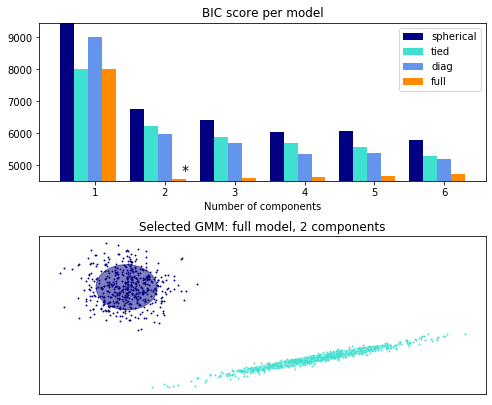

In [9]:
# This code is from the sklearn documentation
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [ ]:
# Unsupervised Image Classification
# using Gaussian Mixture Model Expectation Maximization
# by William F. Basener
# University of Virginia, School of Data Science

from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# read the image and convert to numpy array
im = Image.open('Haiti_Image.tif')
imArray = np.array(im)
nrows, ncols, nbands = np.shape(imArray)

# reshape the image array to num_observations by num_features (1,000,000 by 3)
X = np.reshape(imArray,[nrows*ncols,nbands])

# Create and train our Gaussian Mixture Expectation Maximization Model
l = list()

for i in range(1, 10, 1):
    for j in range(1, 10000, 1000):
        model = GaussianMixture(n_components=i, tol=j/10000)
        model.fit(X)
        yhat = model.predict(X)
        print(i, j)
        l += [(i, j, model.bic(X))]

1 1
1 1001
1 2001
1 3001
1 4001
1 5001
1 6001
1 7001
1 8001
1 9001
2 1
2 1001
2 2001
2 3001
2 4001
2 5001
2 6001
2 7001
2 8001
2 9001
3 1
3 1001
3 2001
3 3001
3 4001
3 5001
3 6001
3 7001
3 8001
3 9001
4 1
4 1001
4 2001
4 3001
4 4001
4 5001
4 6001
4 7001
4 8001
4 9001
5 1
5 1001
5 2001
5 3001
5 4001
5 5001
5 6001
5 7001
5 8001
5 9001
6 1
6 1001
6 2001
6 3001
6 4001
6 5001
6 6001
6 7001
6 8001
6 9001
7 1
7 1001
7 2001
7 3001
7 4001
7 5001
7 6001


In [ ]:
x.sort(key = lambda x: x[3], reverse = True)

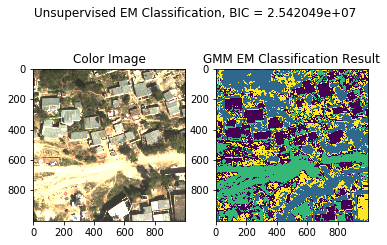

In [25]:


# reshape the result into an image
imSubset_hat = np.reshape(yhat,[nrows,ncols])

# plot the output, including the BIC in the title
plt.figure()
plt.suptitle('Unsupervised EM Classification, BIC = '+"{:e}".format(model.bic(X)))
plt.subplot(121)
plt.imshow(imArray)
plt.title('Color Image')
plt.subplot(122)
plt.imshow(imSubset_hat)
plt.title('GMM EM Classification Result')
plt.show()

In [ ]:
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
from scipy import linalg
import matplotlib as mpl
import itertools


In [ ]:
def f(x, y):
    z = np.column_stack([x.ravel(), y.ravel()])
    return (0.1*st.multivariate_normal([0,0], 1*np.eye(2)).pdf(z) +
            0.4*st.multivariate_normal([3,3], 2*np.eye(2)).pdf(z) +
            0.5*st.multivariate_normal([0,5], 3*np.eye(2)).pdf(z))

In [ ]:
# Example of a mixture of 3 Gaussians

s = 200
x = np.linspace(-3, 6, s)
y = np.linspace(-3, 8, s)
X, Y = np.meshgrid(x, y)
Z = np.reshape(f(X, Y), (s, s))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
plt.title('Gaussian Mxixture Model');

In [ ]:
# EM algorithm 

def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)
    color_iter = itertools.cycle(['navy', 'darkorange', 'turquoise', 'cornflowerblue'])

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(len(mus)):
            for i in range(n):
                ws[j, i] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
        ws /= ws.sum(0)

        # M-step
        pis = np.zeros(k)
        for j in range(len(mus)):
            for i in range(n):
                pis[j] += ws[j, i]
        pis /= n

        mus = np.zeros((k, p))
        for j in range(k):
            for i in range(n):
                mus[j] += ws[j, i] * xs[i]
            mus[j] /= ws[j, :].sum()

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            for i in range(n):
                ys = np.reshape(xs[i]- mus[j], (2,1))
                sigmas[j] += ws[j, i] * np.dot(ys, ys.T)
            sigmas[j] /= ws[j,:].sum()
            
        
        # show the means of the clusters
        new_mus = pd.DataFrame(mus)
        print("")
        print("μ values")
        print(new_mus)
        
        # Plot the data with ellipses
        
        subplot = plt.subplots(figsize=(9, 7))
        ax = plt.subplot(111)

    
        for i, (mean, cov, color) in enumerate(zip(mus, sigmas,
                                           color_iter)):
            v, w = linalg.eigh(cov)
            plt.scatter(xs[:,0], xs[:,1], .8)

            # Plot an ellipse to show the Gaussian component
            angle = np.arctan2(w[0][1], w[0][0])
            angle = 180. * angle / np.pi  # convert to degrees
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
            #ell.set_clip_box(plt.bbox)
            ell.set_alpha(.5)
            ax.add_artist(ell)

        # update complete log likelihoood
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
            ll_new += np.log(s)
        print(f'log_likelihood: {ll_new:3.4f}')
        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

In [ ]:
# 2 clusters in the data
# Guess starting points

np.random.seed(123)

# create data set
n = 1000
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2)


In [ ]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_orig(xs, pis, mus, sigmas)

In [ ]:
# 2 cluster in the data (same data), but guess 3
# initial guesses for parameters
# random seed

np.random.seed(123)

pis = np.random.random(3)
pis /= pis.sum()
mus = np.random.random((3,2))
sigmas = np.array([np.eye(2)] * 3)


In [ ]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_orig(xs, pis, mus, sigmas)
